In [39]:

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [102]:
import tensorflow as tf
import os

In [103]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [104]:
import cv2
import imghdr

In [105]:
data_dir = 'manrega data' 

In [106]:
os.listdir(data_dir)

['buildings', 'dams', 'ponds', 'roads']

In [107]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [108]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [109]:
tf.data.Dataset??

In [110]:
import numpy as np
from matplotlib import pyplot as plt

In [111]:
data = tf.keras.utils.image_dataset_from_directory('manrega data')
# this command is used for inferred labeling  

Found 288 files belonging to 4 classes.


In [112]:
data_iterator = data.as_numpy_iterator()

In [113]:
batch = data_iterator.next()

In [114]:
 batch[0].shape
 #images being represented as numpy array

(32, 256, 256, 3)

In [115]:
data_iterator

In [116]:
len(batch)
# length of the batch comes 2 as there are two parts of the batch one is images and other is labeels at indices 0 and 1 repectively

2

In [117]:
batch[1]

array([1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 3, 0, 0, 0, 3, 0, 1, 1, 1,
       0, 2, 1, 2, 0, 1, 3, 1, 1, 1])

In [118]:

data = data.map(lambda x,y: (x/255, y))

In [119]:
scalled_iterator=data.as_numpy_iterator()

In [120]:
batch=scalled_iterator.next()

In [121]:
batch[0].max()

1.0

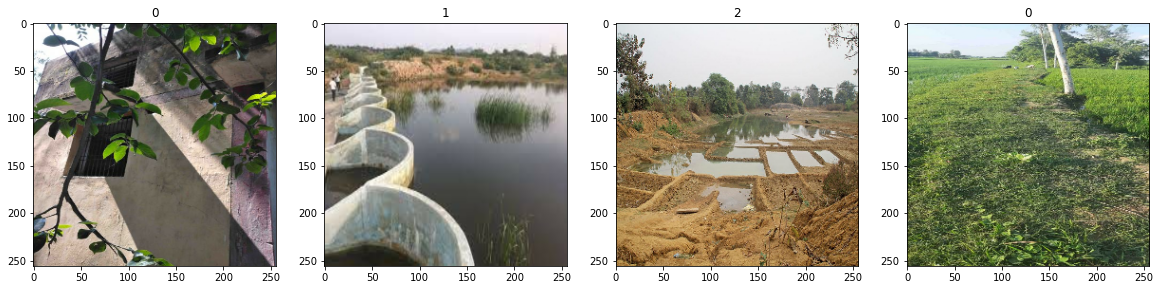

In [122]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [123]:
len(data)

9

In [124]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [125]:
test_size+val_size+train_size

9

In [126]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [128]:
model = Sequential()

In [129]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [130]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [131]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [132]:
logdir='manrega logs'


In [133]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [170]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/50
7/7 [==============================] - 9s 1s/step - loss: -165976.7188 - accuracy: 0.5312 - val_loss: -163128.2969 - val_accuracy: 0.4375
Epoch 2/50
7/7 [==============================] - 10s 1s/step - loss: -163666.0781 - accuracy: 0.4554 - val_loss: -35663.5781 - val_accuracy: 0.5938
Epoch 3/50
7/7 [==============================] - 11s 1s/step - loss: -303251.0312 - accuracy: 0.4688 - val_loss: -123207.1250 - val_accuracy: 0.3750
Epoch 4/50
7/7 [==============================] - 9s 1s/step - loss: -308504.5000 - accuracy: 0.3973 - val_loss: -830941.6875 - val_accuracy: 0.3438
Epoch 5/50
7/7 [==============================] - 9s 1s/step - loss: -385409.4375 - accuracy: 0.4911 - val_loss: -581058.7500 - val_accuracy: 0.5938
Epoch 6/50
7/7 [==============================] - 8s 1s/step - loss: -610318.0000 - accuracy: 0.4509 - val_loss: 455203.5312 - val_accuracy: 0.4062
Epoch 7/50
7/7 [==============================] - 9s 1s/step - loss: -343008.0625 - accuracy: 0.4241 - val

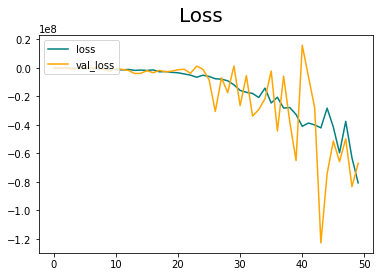

In [237]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


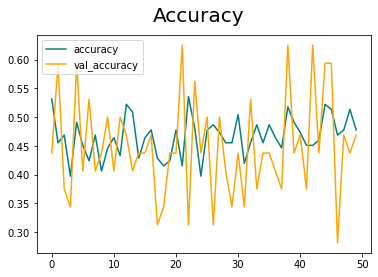

In [238]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [239]:
#Evaluate

In [240]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [241]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [242]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 0s 188ms/step


In [243]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()} ,Accuracy:{ acc.result().numpy()}')


Precision:0.75,Recall:1.0 ,Accuracy:0.40625


In [244]:
#TEST

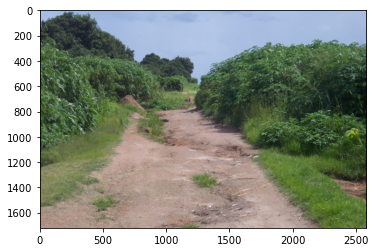

In [245]:
img = cv2.imread('roadTest.JPG')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

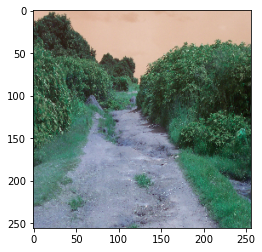

In [246]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [247]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 25ms/step


In [248]:
yhat

array([[1.]], dtype=float32)

In [204]:
if yhat >0 and yhat<1: 
    print(f'building')
elif yhat >=1 and yhat<2:
    print(f'dam')
elif yhat >=2 and yhat<3:
    print(f'ponds')    
else:
    print(f'roads')


dam


In [91]:
from tensorflow.keras.models import load_model

In [109]:
model.save(os.path.join('models','imageclassifier.h5'))


In [112]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [113]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 149ms/step


array([[0.0399962]], dtype=float32)